# **Walk Run Class**

# Problem Statement
* **Task 1**:-Prepare a complete data analysis report on the given data.

* **Task 2**:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.


# **Task 1: Data Analysis Report**

**Step 1:Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load Dataset**

In [ ]:
df=pd.read_csv('walkrun.csv')

In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


**Step 3:Basic Data Exploration**

In [ ]:
print(df.info())
print(df.describe().T)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB
None
                  count      mean       std     min       25%     50%  \
wrist           88588.0  0.522170  0.499511  0.0000  0.000000  1.0000   
activity        88588.0  0.500801  0.500002  0.0000  0.000000  1.0000   
acceleration_x  8858

**Step 4: Checking Missing Values and Duplicates**

In [ ]:
print(df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")


date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64
Duplicate rows: 0


**Step 5: Data Visualization**

**Distribution of Target Variables**

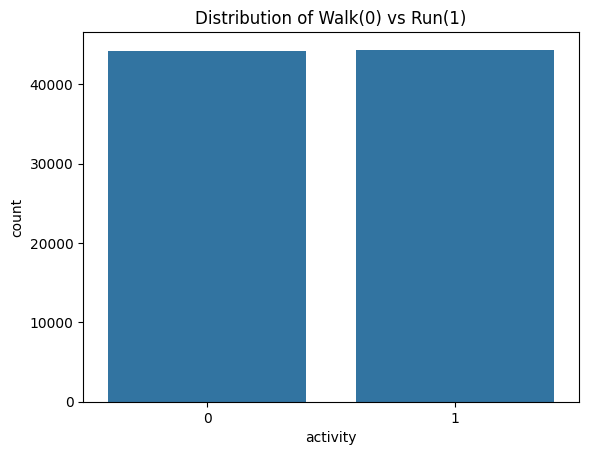

In [ ]:
sns.countplot(x='activity', data=df)
plt.title('Distribution of Walk(0) vs Run(1)')
plt.show()


**Correalation Heatmap**

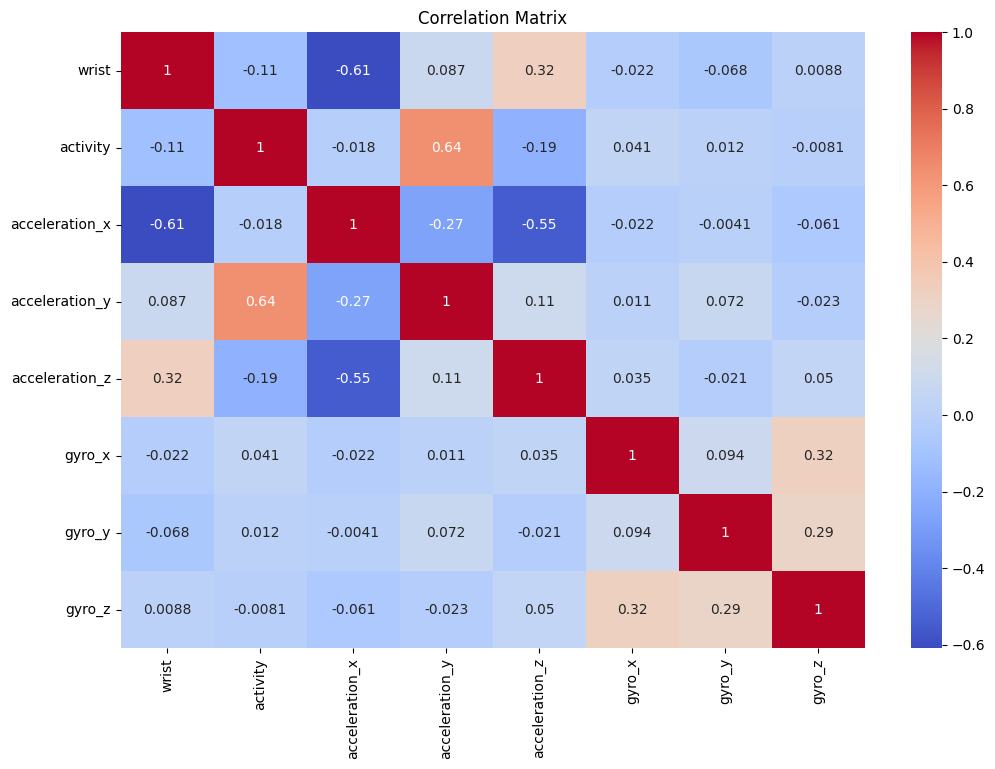

In [ ]:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Boxplots to compare activity**

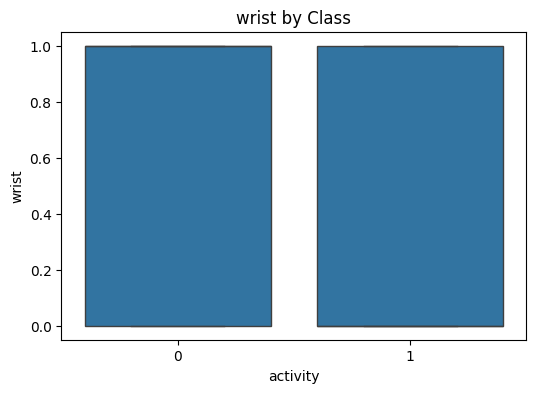

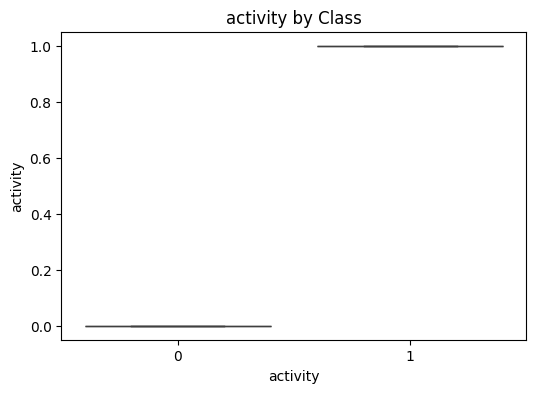

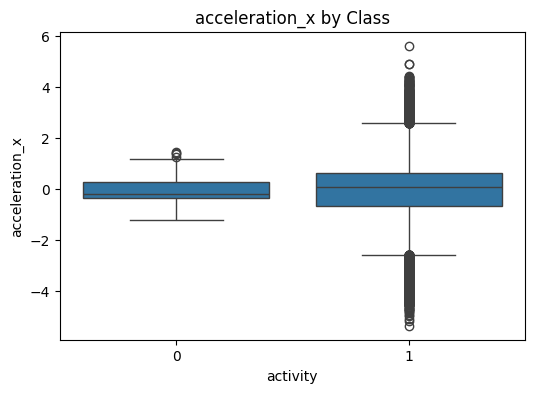

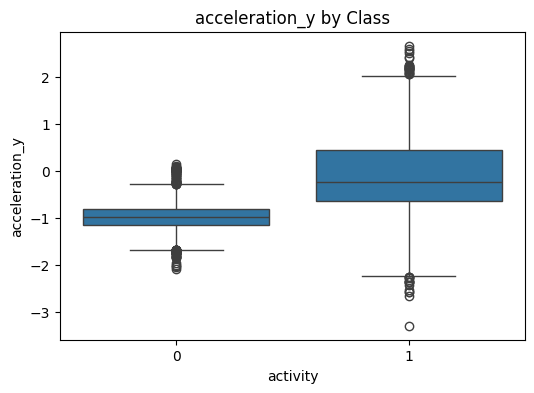

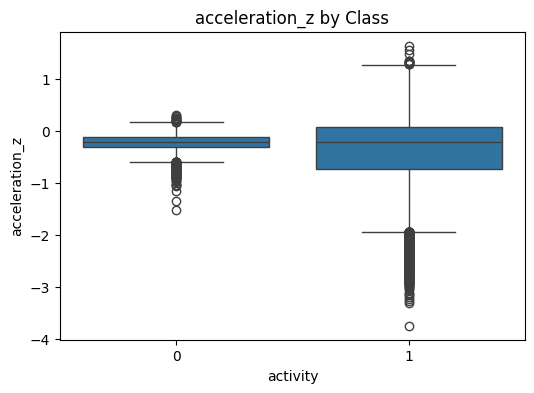

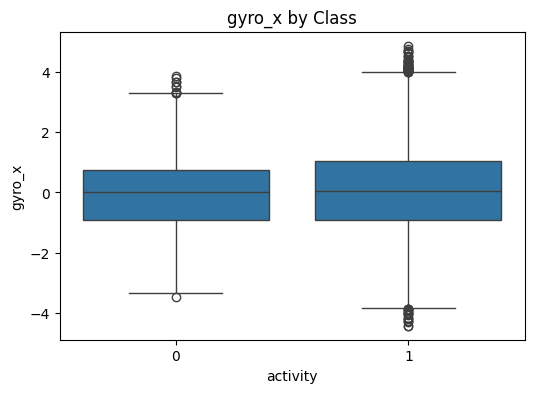

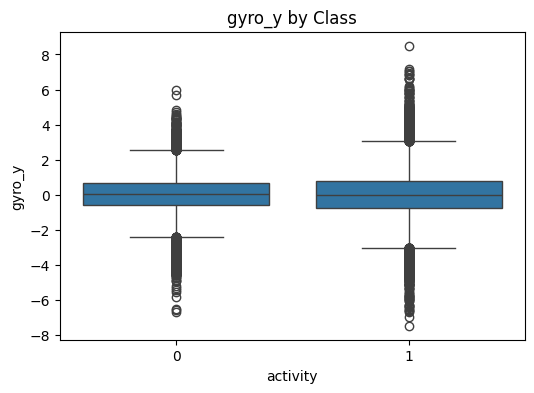

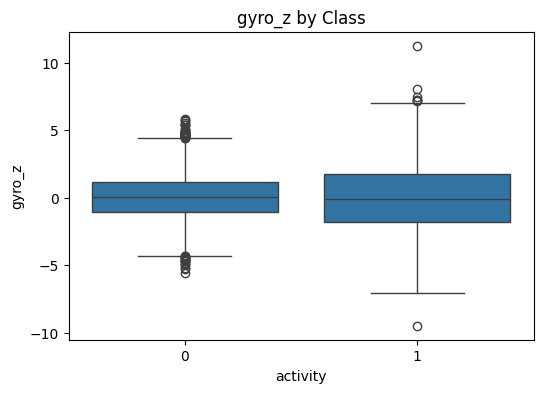

In [ ]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='activity', y=column, data=df)
    plt.title(f'{column} by Class')
    plt.show()


# **Task 2:Build a Classification Model**

**Step 6: Prepare data for Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
X = df.drop(['activity', 'date', 'time', 'username'], axis=1)
y = df['activity']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Here activity is an dependent variable(Target Variable)**
* 0-->**Walk**
* 1-->**Run**

**Reamining all the variables are independent variables(Features)**

**Step 7: Train Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      8913
           1       0.90      0.82      0.86      8805

    accuracy                           0.86     17718
   macro avg       0.87      0.86      0.86     17718
weighted avg       0.87      0.86      0.86     17718



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



**Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svc))


SVM:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



**Step 8: confusion Matrix**

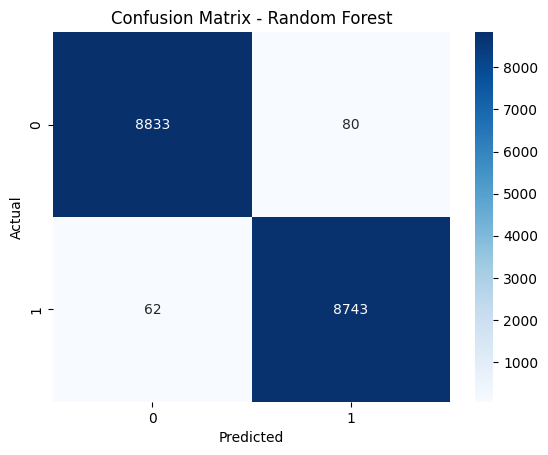

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Step 9: Feature Importance**

Here we have to Use Random Forest Classifier for best model.

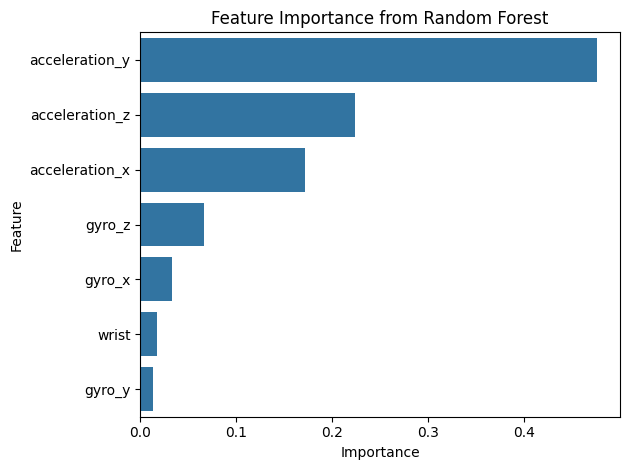

In [ ]:
importances = rf.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


* **Acceleration features dominate** because walking and running differ greatly in linear motion patterns.

* **Gyroscope and wrist info** add minor refinement but aren't key predictors.

* **Model can be simplified** by focusing on top 3–4 features with minimal loss of accuracy.

# **Checking whether a person is running or walking based on the predictor variables**

1. **Process the New Input**
* Suppose we get a new sensor reading  

In [ ]:
new_data = pd.DataFrame([{
    'wrist': 0,
    'acceleration_x': 0.4,
    'acceleration_y': 9.5,
    'acceleration_z': -0.8,
    'gyro_x': 0.1,
    'gyro_y': -0.02,
    'gyro_z': 0.3
}])


2. **Use the Trained Model**
* Feed the processed input to the trained classifier (Random Forest) to get the predicted class.


In [ ]:
# Standardize the new input using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained Random Forest model
prediction = rf.predict(new_data_scaled)

# Interpret result
activity = 'Running' if prediction[0] == 1 else 'Walking'
print("Predicted activity:", activity)


Predicted activity: Running
